In [3]:
%%capture 
# ^^ Hides the output of this cell

from scipy.stats.stats import pearsonr
from matplotlib import style
import seaborn  as sns


# Import other two preprocessed data
%run 'Employment Pre-processing.ipynb'
%run 'Graduates 2012 Pre-processing.ipynb'
%run 'Graduates 2013 Pre-processing.ipynb'
%run 'Graduates 2014 Pre-processing.ipynb'
%run 'Graduates 2015 Pre-processing.ipynb'
%run 'Vacancies Pre-processing.ipynb'


In [4]:
# Get the indices from preprocessed graduates dataframe
wanted_indices = list(preprocessed_grad_df.index)

# Remove any state that is not present in the graduates dataframe
preprocessed_employ_df = preprocessed_employ_df.loc[wanted_indices]

# Show the new employed persons dataframe
print(preprocessed_employ_df.shape)

# Remove any state that is not present in the graduates dataframe
preprocessed_vac_df = preprocessed_vac_df.loc[wanted_indices]

# Show the new employed persons dataframe
print(preprocessed_vac_df.shape)
preprocessed_vac_df

(14, 21)
(14, 22)


,"Agriculture, Forestry & Fishing",Mining & Quarrying,Manufacturing,"Electricity, Gas, Steam & Air Conditioning Supply","Water Supply, Sewerage, Waste Management & Remediation Activities",Construction,"Wholesale & Retail Trade, Repair of Motor Vehicles & Motorcycles",Transportation & Storage,Accomodation & Food Service Activities,Information & Communication,...,"Professional, Scientific & Technical Activities",Administrative & Support Service Activities,Public Administration & Defence,Education,Human Health & Social Work Activities,"Arts, Entertainment & Recreational",Other Service Activities,Activities of Households as Employers,Activities of Extraterritorial Organisation & Bodies,Total
Johor,11831.0,2.0,110479.0,86.0,52.0,27799.0,785.0,942.0,2033.0,266.0,...,249.0,1232.0,116.0,72.0,230.0,180.0,2733.0,24.0,43.0,161911.0
Kedah,1289.0,0.0,11274.0,14.0,83.0,956.0,872.0,53.0,1229.0,71.0,...,37.0,146.0,51.0,294.0,3.0,4.0,524.0,200.0,5.0,18650.0
Kelantan,5333.0,1.0,2317.0,18.0,0.0,674.0,32.0,2.0,60.0,64.0,...,839.0,136.0,7.0,577.0,23.0,3.0,405.0,2.0,0.0,11540.0
Melaka,4377.0,1.0,17459.0,44.0,87.0,4680.0,119.0,19.0,1642.0,129.0,...,111.0,407.0,20.0,69.0,0.0,2.0,1870.0,310.0,4.0,32413.0
Negeri Sembilan,3638.0,23.0,18829.0,11.0,147.0,4826.0,602.0,147.0,466.0,273.0,...,83.0,336.0,45.0,560.0,72.0,0.0,1280.0,1.0,0.0,32173.0
Pahang,11636.0,7.0,6791.0,0.0,7.0,2799.0,90.0,16.0,382.0,15.0,...,11.0,598.0,2.0,63.0,0.0,0.0,460.0,0.0,0.0,23976.0
Perak,15343.0,91.0,29157.0,39.0,62.0,2377.0,224.0,2.0,726.0,8.0,...,66.0,78.0,232.0,18.0,31.0,5.0,1359.0,20.0,0.0,50595.0
Perlis,0.0,0.0,815.0,0.0,0.0,59.0,18.0,0.0,19.0,0.0,...,0.0,0.0,0.0,9.0,16.0,0.0,4.0,0.0,0.0,1045.0
Pulau Pinang,339.0,0.0,47765.0,61.0,183.0,3438.0,449.0,626.0,969.0,16.0,...,511.0,1569.0,19.0,77.0,4.0,11.0,1429.0,200.0,2.0,57737.0
Sabah,85163.0,1087.0,9455.0,297.0,33.0,11742.0,1869.0,188.0,2086.0,83.0,...,455.0,227.0,106.0,115.0,96.0,23.0,7170.0,3.0,0.0,120676.0


In [5]:
# Make a copy of graduate dataset of year 2015 to make analysis
preprocessed_grad_df = preprocessed_grad_2015_df.copy()

# Drop column 'Year' as it is not required
preprocessed_grad_df = preprocessed_grad_df.drop('Year', 1)

# Show the pre-processed graduates dataframe 
preprocessed_grad_df

,"Engineering, Manufacturing and Construction",Health and Welfare,Education,Service,Agriculture and Veterinary,"Social Science, Business, and Laws","Science, Maths, and Computer",Literature and Humanity,Total
State,,,,,,,,,
Johor,6723,0,1589,101,0,1167,1746,33,11359
Kedah,0,98,959,205,0,4856,522,69,6709
Kelantan,97,50,0,149,115,275,120,256,1062
Melaka,1782,0,0,0,0,220,426,0,2428
Negeri Sembilan,11,183,3,0,0,382,304,10,893
Pahang,1544,0,0,70,0,190,314,4,2122
Perak,0,445,9871,1,0,90,903,497,11807
Perlis,2062,0,0,0,0,376,14,0,2452
Pulau Pinang,1703,1229,575,58,0,1591,869,718,6743


In [12]:
########## Finding Pearson Correlations for all attributes in both datasets ##########
# Get new dictionary
pearson_r_dict = {}

# Calculate all the correlations and insert the value into the dict accordingly
for i in preprocessed_vac_df.columns:
    temp = {}
    ivalues = preprocessed_vac_df[i].values.tolist()  
    for j in preprocessed_grad_df.columns:
        jvalues = preprocessed_grad_df[j].values.tolist()
        n1, n2, pearson_r = corr_without_outliers(jvalues, ivalues)
        temp[j] = round(pearson_r,3)
    pearson_r_dict[i] = temp    

# Show the dictionary
pearson_r_dict    

{'Agriculture, Forestry & Fishing': {'Engineering, Manufacturing and Construction': -0.085,
  'Health and Welfare': 0.051,
  'Education': -0.08,
  'Service': 0.145,
  'Agriculture and Veterinary': 0.641,
  'Social Science, Business, and Laws': 0.231,
  'Science, Maths, and Computer': 0.017,
  'Literature and Humanity': 0.054,
  'Total': 0.031},
 'Mining & Quarrying': {'Engineering, Manufacturing and Construction': -0.095,
  'Health and Welfare': 0.126,
  'Education': -0.131,
  'Service': 0.139,
  'Agriculture and Veterinary': 0.608,
  'Social Science, Business, and Laws': 0.372,
  'Science, Maths, and Computer': 0.108,
  'Literature and Humanity': 0.108,
  'Total': -0.003},
 'Manufacturing': {'Engineering, Manufacturing and Construction': 0.086,
  'Health and Welfare': -0.207,
  'Education': 0.848,
  'Service': -0.194,
  'Agriculture and Veterinary': -0.244,
  'Social Science, Business, and Laws': -0.018,
  'Science, Maths, and Computer': 0.302,
  'Literature and Humanity': -0.065,
  '

Pearson correlation is -0.14445466068999344


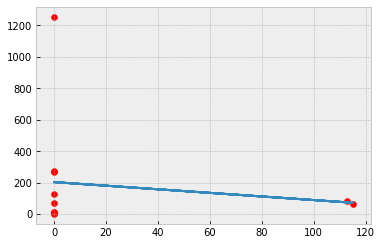

In [13]:
# Print out scatter plot and its regression line along with its pearson correlation

import matplotlib
from numpy import polyfit

# Prepare the lists
column1 = preprocessed_vac_df['Information & Communication'].values.tolist()
column2 = preprocessed_grad_df['Agriculture and Veterinary'].values.tolist()

column1s, column2s, corre = corr_without_outliers(column2, column1)

# Print the pearson correlation value
print("Pearson correlation is " + str(corre))

# Get the regression line value
m,b = polyfit(column1s, column2s, 1) 

# Get the regression line value for x along the line
reg_line = [(m*x)+b for x in column1s]

# Plot the line
style.use("bmh")
plt.plot(column1s,reg_line)
plt.scatter(column1s, column2s, color="red")
plt.show()

In [11]:
# Get the correlation and excluding the outliers
def corr_without_outliers(xs, ys):
    
    s = pd.Series(xs)
    
    # Find Interquartile range(IQR) for the dataset
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3-q1

    processed_xs = []
    processed_ys = []

    # Remove outliers (Suspected outliers)
    for i in range(len(xs)):
        if (xs[i] < (iqr*1.5 + q3)):
            processed_xs.append(xs[i])
            processed_ys.append(ys[i])

    # Finding pearson correlation        
    pearson_r, p_value = pearsonr(processed_xs, processed_ys)  
    
    return processed_xs, processed_ys, pearson_r
    

In [17]:
# Create a new dataframe to store all the information regarding the correlation
pearson_df = pd.DataFrame()

# Get all the index
index_list = preprocessed_vac_df.columns.tolist()

# Set the index to be the values of the column 'Vacancies Industry'
pearson_df['Vacancies Industry'] = index_list

# Set the index of the dataframe to be the value in the column 'Vacancies Industry'
pearson_df.set_index('Vacancies Industry', inplace=True)

# Collect all the columns from the dataframe 'preprocessed_grad_df'
columns_list = preprocessed_grad_df.columns.tolist()

# Set the values for all columns by getting the correlation value from the pearson_df
for column in columns_list:
    values_list = []
    for index in index_list:
        values_list.append(pearson_r_dict.get(index).get(column))
    pearson_df[column] = values_list
 
# Show the first 5 rows of the dataframe
pearson_df.head()   

,"Engineering, Manufacturing and Construction",Health and Welfare,Education,Service,Agriculture and Veterinary,"Social Science, Business, and Laws","Science, Maths, and Computer",Literature and Humanity,Total
Vacancies Industry,,,,,,,,,
"Agriculture, Forestry & Fishing",-0.085,0.051,-0.080,0.145,0.641,0.231,0.017,0.054,0.031
Mining & Quarrying,-0.095,0.126,-0.131,0.139,0.608,0.372,0.108,0.108,-0.003
Manufacturing,0.086,-0.207,0.848,-0.194,-0.244,-0.018,0.302,-0.065,0.498
"Electricity, Gas, Steam & Air Conditioning Supply",-0.136,0.169,0.612,-0.033,0.363,0.462,0.367,0.148,0.070
"Water Supply, Sewerage, Waste Management & Remediation Activities",0.170,-0.020,0.169,-0.149,-0.361,0.209,0.143,0.091,0.251


[Text(73.5,0.5,'Vacancies in Industries'), Text(0.5,100.5,"Graduates' Majors")]

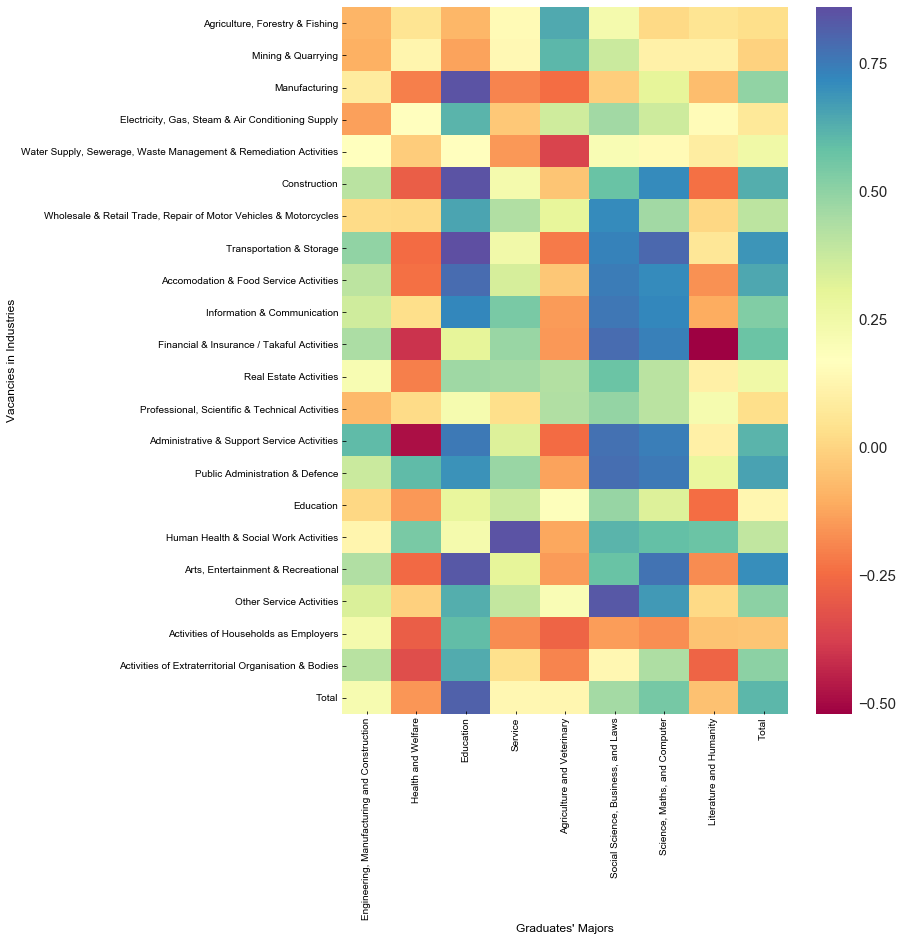

In [15]:
########## Generating a Heatmap ##########

# Set the size of the heatmap
fig, ax = plt.subplots(figsize=(10,13))
sns.set(font_scale = 1.5)

# Initialize variables to store different color scheme
color_scheme1 = 'viridis'
color_scheme2 = 'Spectral'
color_scheme3 = 'nipy_spectral_r'

# Codes of creating the heatmap #
r = sns.heatmap(pearson_df, cmap=color_scheme2)
#r.set_title("Heatmap of All Pearson Correlation Coefficients")
r.set(xlabel='Graduates\' Majors', ylabel='Vacancies in Industries')

In [16]:
# Collect all the preprocessed_grad_df from year 2012-2015
frames = [preprocessed_grad_2012_df,
          preprocessed_grad_2013_df,
          preprocessed_grad_2014_df,
          preprocessed_grad_2015_df]

# Concat them into a dataframe
concat_grad_df = pd.concat(frames)

# Sort the dataframe based on index
concat_grad_df.sort_index(inplace=True)

# Show the dataframe
concat_grad_df

,"Engineering, Manufacturing and Construction",Health and Welfare,Education,Service,Agriculture and Veterinary,"Social Science, Business, and Laws","Science, Maths, and Computer",Literature and Humanity,Total,Year
State,,,,,,,,,,
Johor,5726.0,0.0,1131.0,85.0,0.0,832.0,1633.0,26.0,9433.0,2012
Johor,5773.0,0.0,1780.0,71.0,0.0,679.0,1227.0,39.0,9569.0,2013
Johor,6723.0,0.0,1589.0,101.0,0.0,1167.0,1746.0,33.0,11359.0,2015
Johor,6641.0,0.0,896.0,114.0,0.0,1117.0,1701.0,62.0,10531.0,2014
Kedah,0.0,77.0,345.0,212.0,0.0,5417.0,467.0,84.0,6602.0,2014
Kedah,0.0,106.0,876.0,280.0,0.0,5558.0,529.0,51.0,7400.0,2013
Kedah,0.0,98.0,959.0,205.0,0.0,4856.0,522.0,69.0,6709.0,2015
Kedah,0.0,220.0,886.0,347.0,35.0,5471.0,608.0,73.0,7640.0,2012
Kelantan,76.0,33.0,0.0,64.0,92.0,101.0,74.0,130.0,570.0,2014


In [49]:
# Write all the processed dfs for the data to be visualized by 3rd party app
pearson_df.to_csv('Pearson-Correlation-DF.csv')
preprocessed_grad_df.to_csv('Preprocessed-Grads-2015-DF.csv')
preprocessed_vac_df.to_csv('Preprocessed-Vac-2016-DF.csv')
concat_grad_df.to_csv('Concat-Grads-DF.csv')

#preprocessed_grad_2012_df.to_csv('Graduates 2012 Pre-processing.ipynb')
#preprocessed_grad_2013_df.to_csv('Graduates 2013 Pre-processing.ipynb')
#preprocessed_grad_2014_df.to_csv('Graduates 2014 Pre-processing.ipynb')
#preprocessed_grad_2015_df.to_csv('Graduates 2015 Pre-processing.ipynb')